<a href="https://colab.research.google.com/github/solobala/DLL30/blob/main/DLL30_DZ4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее** задание по теме «Архитектуры свёрточных сетей»

**Цель задания:**

изучить работу с готовыми моделями из torchvision.

**Контекст**

Вам необходимо подобрать базовую модель для работы по вашей задаче. Вы пробуете обучать различные модели на “ваших” данных. По результатам отберёте лучшую для дальнейшего обучения.

**Задание**

Вам необходимо провести эксперименты по начальному обучению различных моделей и сравнить результаты.

1. Возьмите датасет EMNIST из torchvision

2. Обучите на нём модели: ResNet 18, VGG 16, Inception v3, DenseNet 161 (с нуля по 10 эпох)

3. Сведите результаты обучения моделей (графики лоса) в таблицу и сравните их.


**Задание со звездочкой**

* Выполните то же задание, используя датасет hymenoptera_data

Инструкция к выполнению задания

* Загрузите датасет, посмотрите примеры картинок в нём и проверьте наличествующие классы и их дисбаланс.

* Создайте модель текущего типа, используя интерфейс torchvision для нужного количества классов.

* Обучите модель с нуля 10 эпох. Фиксируйте значение функции потерь в список для последующего отображения.

Повторите пункты 2 и 3 для всех указанных вариантов моделей.

**Формат сдачи работы**

Прикрепите ссылку на готовое решение в личном кабинете. Работу можно отправлять в виде ссылки на python-ноутбук из GitHub, Google Colaboratory или аналогичных платформ. Не забудьте открыть доступ на просмотр и комментирование.

**Критерии оценивания**

По итогу выполнения задания вы получите зачёт.

Задание считается выполненным, если:

* вы обучили каждую модель до некоторого улучшения качества

* составлена таблица обучения для сравнения

Задание будет отправлено на доработку, если:

* использованы не все типы моделей

* не составлена сводная таблица с результатами


# Импорт библиотек и пользовательские функции

In [1]:
import torch
from torch import nn
import torchvision as tv # consists of popular datasets, model architectures, and common image transformations for computer vision
from torchsummary import summary # посмотреть архитектуру
import time

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# 1. Загрузка датасета
Примечание 1:


---


В локальном клмпьютере отсутствует карта с GPU. Поэтому было принято решение выполнить обученние всех моделей , используя вычислительные ресурсы Kaggle. Данный ноутбук использован в презентационных целях - для визуализации исходных данных и обработки полученных результатов - и содержит ссылки на 4 ноутбука с Kaggle.

Примечание 2:


---


В связи с ограниченностью вычислительных ресурсов задача решалась с использованием split="MNIST"

Примечание 3:


---


При использовании предобученных моделей из torchvision используется вариант transforms.Compose с преобразованием исходных данных в 3-канальное изображение. Соответственно, происходит перезагрузка train_dataset и test_dataset. Используется в ноутбуках по обучению resnet18 и densenet161.

При обучении vgg16 и inception v3 предобученные модели не используются, т.к не хватает вычислительных ресурсов CUDA

In [6]:
BATCH_SIZE = 256
# Переводим картинки в 224х224 и в тензор
transoforms = tv.transforms.Compose([
    tv.transforms.Resize((224, 224)),
    tv.transforms.ToTensor()
])
train_dataset = tv.datasets.EMNIST('.', split='mnist', train=True, transform=transoforms, download=True)
test_dataset = tv.datasets.EMNIST('.', split='mnist', train=False, transform=transoforms, download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

100%|██████████| 561753746/561753746 [00:06<00:00, 92521927.01it/s] 


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


##1.1. Визуализация

In [7]:
train_dataset.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

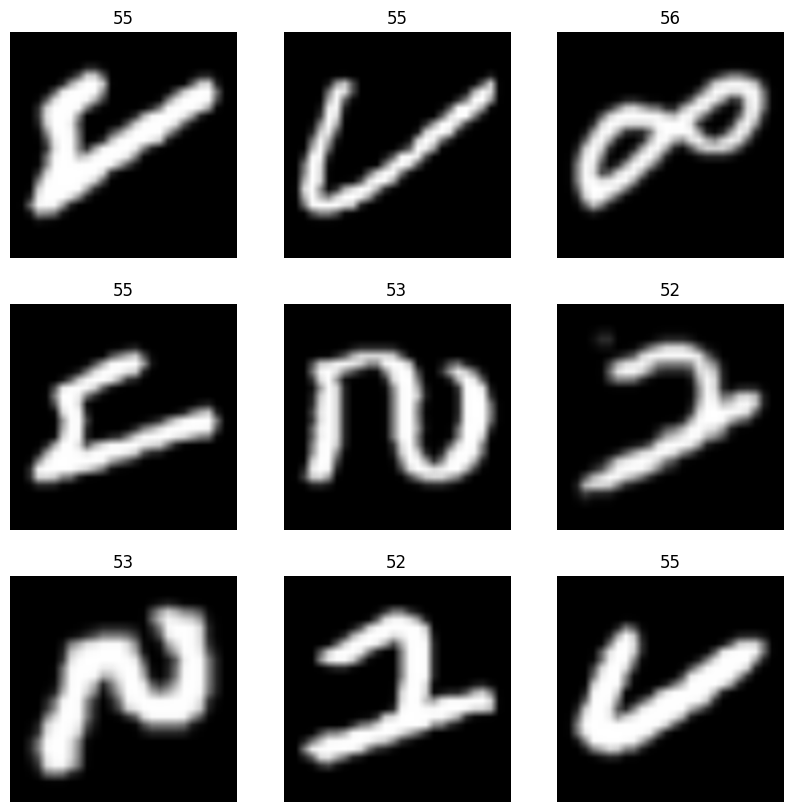

In [8]:
labels_map={
    0: '48',
    1: '49',
    2: '50',
    3: '51',
    4: '52',
    5: '53',
    6: '54',
    7: '55',
    8: '56',
    9: '57',
}

figure = plt.figure(figsize = (10,10))
cols, rows = 3, 3

for i in range (1, cols*rows + 1):
    sample_idx = torch.randint(len(train_dataset), size = (1,)).item()
    image, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
plt.show()

In [9]:
train_dataset.targets

tensor([4, 1, 4,  ..., 1, 5, 0])

In [10]:
# считаем количество элементов
targets = train_dataset.targets
counts = torch.bincount(targets)
for i, count in enumerate(counts):
    print(f"{i}: {count}")

0: 6000
1: 6000
2: 6000
3: 6000
4: 6000
5: 6000
6: 6000
7: 6000
8: 6000
9: 6000


классы датасета сбалансированы

# 2. Обучение моделей

## 2.1. ResNET 18

[Ноутбук с Kaggle, в котором происходило обучение ResNET18, сохранен в репозитории github](https://github.com/solobala/DLL30/blob/main/DLL30_DZ4_resnet.ipynb)

[Результаты обучения ResNet18](https://github.com/solobala/DLL30/blob/main/resnet.csv)

## 2.2. VGG16

[Ноутбук с Kaggle, в котором происходило обучение VGG16, сохранен в репозитории github](https://github.com/solobala/DLL30/blob/main/DLL30_DZ4_vgg16.ipynb)

[Результаты обучения VGG16](https://github.com/solobala/DLL30/blob/main/vgg16.csv)

## 2.3. Inception v3

[Ноутбук с Kaggle, в котором происходило обучение Inception v3, сохранен в репозитории github](https://github.com/solobala/DLL30/blob/main/DLL30_DZ4_inception_v3.ipynb)

[Результаты обучения Inception v3](https://github.com/solobala/DLL30/blob/main/inception_v3.csv)

## 2.4. DenseNet 161

[Ноутбук с Kaggle, в котором происходило обучение DenseNet 161, сохранен в репозитории github](https://github.com/solobala/DLL30/blob/main/DLL30_DZ4_densenet161.ipynb)

[Результаты обучения DenseNet 161](https://github.com/solobala/DLL30/blob/main/dencenet_161.csv)

## 2.5. Сравнение моделей

### 2.5.1. Загрузка результатов обучения моделей из репозитория

In [21]:
! wget 'https://raw.githubusercontent.com/solobala/DLL30/main/resnet.csv'

--2023-12-15 05:49:27--  https://raw.githubusercontent.com/solobala/DLL30/main/resnet.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561 [text/plain]
Saving to: ‘resnet.csv’

resnet.csv          100%[===================>]     561  --.-KB/s    in 0s      

2023-12-15 05:49:27 (16.8 MB/s) - ‘resnet.csv’ saved [561/561]



In [27]:
! wget 'https://raw.githubusercontent.com/solobala/DLL30/main/vgg16.csv'

--2023-12-15 05:51:56--  https://raw.githubusercontent.com/solobala/DLL30/main/vgg16.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 570 [text/plain]
Saving to: ‘vgg16.csv’

vgg16.csv           100%[===================>]     570  --.-KB/s    in 0s      

2023-12-15 05:51:56 (22.4 MB/s) - ‘vgg16.csv’ saved [570/570]



In [28]:
! wget 'https://raw.githubusercontent.com/solobala/DLL30/main/inception_v3.csv'

--2023-12-15 05:52:25--  https://raw.githubusercontent.com/solobala/DLL30/main/inception_v3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 620 [text/plain]
Saving to: ‘inception_v3.csv’

inception_v3.csv    100%[===================>]     620  --.-KB/s    in 0s      

2023-12-15 05:52:26 (55.5 MB/s) - ‘inception_v3.csv’ saved [620/620]



In [29]:
! wget 'https://raw.githubusercontent.com/solobala/DLL30/main/dencenet_161.csv'

--2023-12-15 05:53:06--  https://raw.githubusercontent.com/solobala/DLL30/main/dencenet_161.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 616 [text/plain]
Saving to: ‘dencenet_161.csv’

dencenet_161.csv    100%[===================>]     616  --.-KB/s    in 0s      

2023-12-15 05:53:06 (31.8 MB/s) - ‘dencenet_161.csv’ saved [616/616]



In [90]:
df_results= pd.DataFrame(columns=['model', 'train_accuracy', 'train_loss', 'test_accuracy','epoch'])
df1 = pd.read_csv('/content/resnet.csv')
df2 = pd.read_csv('/content/vgg16.csv')
df3= pd.read_csv('/content/inception_v3.csv')
df4 = pd.read_csv('/content/dencenet_161.csv')
df_results = pd.concat([df1,df2,df3,df4], ignore_index=True)

In [94]:
df_results

,model,train_accuracy,train_loss,test_accuracy,epoch
0,resnet18,0.866567,0.590512,0.9369,0
1,resnet18,0.944000,0.221177,0.9491,1
2,resnet18,0.953667,0.170367,0.9555,2
3,resnet18,0.958917,0.146143,0.9576,3
4,resnet18,0.962167,0.131354,0.9593,4
5,resnet18,0.964850,0.121129,0.9604,5
6,resnet18,0.966867,0.113501,0.9615,6
7,resnet18,0.967950,0.107511,0.9622,7
8,resnet18,0.969550,0.102632,0.9621,8
9,resnet18,0.970550,0.098548,0.9629,9


## 2.5.2. Сравнение моделей по test_accuracy и времени обучения после 10 эпох

In [99]:
df_results.groupby(by='model').apply(
    lambda x: x.loc[x['test_accuracy'].idxmax()][['test_accuracy', 'epoch']]).sort_values(
        by='test_accuracy', ascending=False).reset_index()

,model,test_accuracy,epoch
0,inception_v3,0.9938,9
1,vgg16,0.9923,4
2,dencenet161,0.9694,9
3,resnet18,0.9629,9


Вывод:

Лучшее качество было достигнуто в модели inception_v3. Близкие результаты показала модель vgg16 всего за 4 эпохи обучения.

В то же время, не совсем корректно сравнивать эти модели по количеству эпох, т.к.время на 1 эпоху у них сильно различается.

Самая быстрая  - vgg16 (примерно 90 секунд на 1 эпоху при использовании GPU 100), затем resnet18 (в среднем 115 секунд на эпоху), далее Inception v3 ( 155 секунд на эпоху) и densenet161(315 секунд на эпоху).

Таким образом, vgg16 достигла хорошего результата почти в 4 раза быстрее, чем inception v3

###2.5.3. Сравнение моделей по величине потерь

In [ ]:
df_losses = pd.DataFrame(columns=[
    'model', 'epoch_0', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9']).astype(
        {'model':str, 'epoch_0':np.float64, 'epoch_1':np.float64, 'epoch_2':np.float64, 'epoch_3':np.float64, 'epoch_4':np.float64,
         'epoch_5':np.float64, 'epoch_6':np.float64, 'epoch_7':np.float64, 'epoch_8':np.float64, 'epoch_9':np.float64})

for i, row in df_results.iterrows():
    model = row['model']
    train_loss = row['train_loss']
    epoch = row['epoch']

    if model not in df_losses['model'].values:
        df_losses = df_losses.append({'model': model}, ignore_index=True)

    df_losses.loc[df_losses['model'] == model, f'epoch_{epoch}'] = train_loss


In [93]:
df_losses.head().style.format('{:.4f}', na_rep='-', subset=df_losses.columns[1:]).background_gradient(cmap='Blues', axis=0)

,model,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9
0,resnet18,0.5905,0.2212,0.1704,0.1461,0.1314,0.1211,0.1135,0.1075,0.1026,0.0985
1,vgg16,0.4919,0.0489,0.0317,0.0250,0.0191,0.0157,0.0128,0.0127,0.0113,0.0100
2,inception_v3,1.8504,0.1247,0.0611,0.0431,0.0353,0.0310,0.0255,0.0245,0.0213,0.0200
3,dencenet161,0.5519,0.2075,0.1555,0.1301,0.1143,0.1032,0.0948,0.0882,0.0827,0.0781


Вывод:
1. Переобучение на 10 эпохах ни для одной из моделей не произошло, все потери убывают с увеличеннием числа эпох обучения
2. Наименьшие потери были получены в более современных глубоких моделях vgg16 и inception v3

Общий вывод:

для выбранного датасета из рассмотренных моделей по соотношению качество/время обучения понаиболее предпочтительно использование vgg16